In [2]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [3]:
#Run the below code in your notebook to check the installed version
import pandas as pd
from pycaret.utils import version
version()
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
import shap
import matplotlib.pyplot as plt
from pycaret.classification import *

%matplotlib inline

1.0.0


In [3]:
data=pd.read_csv('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/var150_BLA_valid_binary_normdata.csv',index_col=0)

In [4]:
data['binary'].value_counts()

Others       3335
BLA_valid     221
Name: binary, dtype: int64

In [5]:
data.head()

Npy     Ptgs2  Pbld1   Gm13889  Cplx3  Tshz2  \
pfc_1_AAACCCAAGTCGTTAC  0.0  0.000000    0.0  1.147602    0.0    0.0   
pfc_1_AAAGGGCGTGGCATCC  0.0  0.000000    0.0  0.000000    0.0    0.0   
pfc_1_AACCCAATCCGCTTAC  0.0  1.034382    0.0  0.000000    0.0    0.0   
pfc_1_AAGAACAAGAGAGCCT  0.0  0.000000    0.0  0.000000    0.0    0.0   
pfc_1_ACAAGCTCAAAGCACG  0.0  0.818405    0.0  0.818405    0.0    0.0   

                           Cyr61     Lypd1     Nr4a2  Dlk1  ...      Rora  \
pfc_1_AAACCCAAGTCGTTAC  0.000000  0.000000  1.147602   0.0  ...  2.262026   
pfc_1_AAAGGGCGTGGCATCC  0.000000  0.000000  0.000000   0.0  ...  0.000000   
pfc_1_AACCCAATCCGCTTAC  1.034382  0.000000  0.000000   0.0  ...  2.110634   
pfc_1_AAGAACAAGAGAGCCT  0.000000  0.000000  1.656318   0.0  ...  1.656318   
pfc_1_ACAAGCTCAAAGCACG  0.000000  0.818405  1.262363   0.0  ...  0.818405   

                           Cdh13  Rnf152    Cdkn1c    Cxcl12  Thsd7a  \
pfc_1_AAACCCAAGTCGTTAC  0.000000     0.0  2.901699  0.000000     0.0   
pfc_1_AAAGGGCGTGGCATCC  3.364502     0.0  0.000000  0.000000     0.0   
pfc_1_AACCCAATCCGCTTAC  0.000000     0.0  0.000000  0.000000     0.0   
pfc_1_AAGAACAAGAGAGCCT  0.000000     0.0  0.000000  1.137830     0.0   
pfc_1_ACAAGCTCAAAGCACG  0.000000     0.0  0.818405  0.818405     0.0   

                            Ldhb    Grin3a    Bcl11b  binary  
pfc_1_AAACCCAAGTCGTTAC  1.667945  1.147602  1.147602  Others  
pfc_1_AAAGGGCGTGGCATCC  2.595888  1.411504  1.411504  Others  
pfc_1_AACCCAATCCGCTTAC  2.110634  0.000000  0.000000  Others  
pfc_1_AAGAACAAGAGAGCCT  1.656318  0.000000  0.000000  Others  
pfc_1_ACAAGCTCAAAGCACG  0.818405  0.000000  0.000000  Others  

[5 rows x 151 columns]

In [6]:
data['binary']=pd.factorize(data['binary'])[0]

In [7]:
data.head()

Npy     Ptgs2  Pbld1   Gm13889  Cplx3  Tshz2  \
pfc_1_AAACCCAAGTCGTTAC  0.0  0.000000    0.0  1.147602    0.0    0.0   
pfc_1_AAAGGGCGTGGCATCC  0.0  0.000000    0.0  0.000000    0.0    0.0   
pfc_1_AACCCAATCCGCTTAC  0.0  1.034382    0.0  0.000000    0.0    0.0   
pfc_1_AAGAACAAGAGAGCCT  0.0  0.000000    0.0  0.000000    0.0    0.0   
pfc_1_ACAAGCTCAAAGCACG  0.0  0.818405    0.0  0.818405    0.0    0.0   

                           Cyr61     Lypd1     Nr4a2  Dlk1  ...      Rora  \
pfc_1_AAACCCAAGTCGTTAC  0.000000  0.000000  1.147602   0.0  ...  2.262026   
pfc_1_AAAGGGCGTGGCATCC  0.000000  0.000000  0.000000   0.0  ...  0.000000   
pfc_1_AACCCAATCCGCTTAC  1.034382  0.000000  0.000000   0.0  ...  2.110634   
pfc_1_AAGAACAAGAGAGCCT  0.000000  0.000000  1.656318   0.0  ...  1.656318   
pfc_1_ACAAGCTCAAAGCACG  0.000000  0.818405  1.262363   0.0  ...  0.818405   

                           Cdh13  Rnf152    Cdkn1c    Cxcl12  Thsd7a  \
pfc_1_AAACCCAAGTCGTTAC  0.000000     0.0  2.901699  0.000000     0.0   
pfc_1_AAAGGGCGTGGCATCC  3.364502     0.0  0.000000  0.000000     0.0   
pfc_1_AACCCAATCCGCTTAC  0.000000     0.0  0.000000  0.000000     0.0   
pfc_1_AAGAACAAGAGAGCCT  0.000000     0.0  0.000000  1.137830     0.0   
pfc_1_ACAAGCTCAAAGCACG  0.000000     0.0  0.818405  0.818405     0.0   

                            Ldhb    Grin3a    Bcl11b  binary  
pfc_1_AAACCCAAGTCGTTAC  1.667945  1.147602  1.147602       0  
pfc_1_AAAGGGCGTGGCATCC  2.595888  1.411504  1.411504       0  
pfc_1_AACCCAATCCGCTTAC  2.110634  0.000000  0.000000       0  
pfc_1_AAGAACAAGAGAGCCT  1.656318  0.000000  0.000000       0  
pfc_1_ACAAGCTCAAAGCACG  0.818405  0.000000  0.000000       0  

[5 rows x 151 columns]

In [8]:
exp1 = setup(data, target = 'binary',session_id=1)

 
Setup Succesfully Completed!


In [9]:
tuned_xgboost = tune_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9317  0.8473  0.0000  0.0000  0.0000 -0.0144
1       0.9438  0.8587  0.0667  1.0000  0.1250  0.1184
2       0.9398  0.8858  0.0000  0.0000  0.0000  0.0000
3       0.9357  0.8031  0.0000  0.0000  0.0000 -0.0076
4       0.9317  0.8377  0.0625  0.3333  0.1053  0.0867
5       0.9357  0.8216  0.0000  0.0000  0.0000  0.0000
6       0.9398  0.8388  0.0625  1.0000  0.1176  0.1109
7       0.9317  0.8586  0.0000  0.0000  0.0000 -0.0076
8       0.9357  0.8487  0.0000  0.0000  0.0000  0.0000
9       0.9395  0.7525  0.0667  0.5000  0.1176  0.1049
Mean    0.9365  0.8353  0.0258  0.2833  0.0466  0.0391
SD      0.0039  0.0347  0.0317  0.3948  0.0572  0.0546

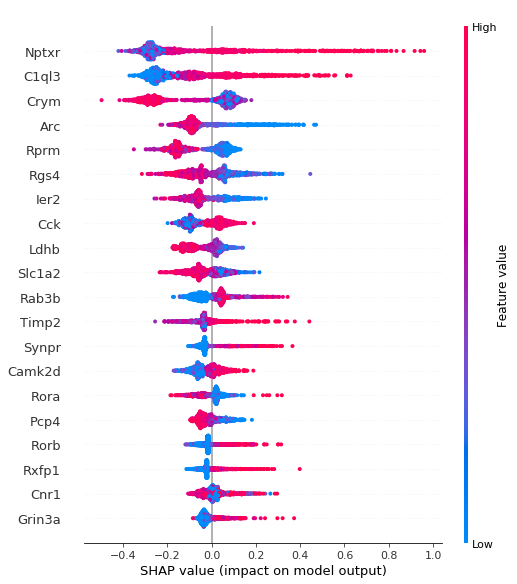

In [10]:
interpret_model(tuned_xgboost) 

In [1]:
explainer = shap.TreeExplainer(tuned_xgboost)
shap_values = explainer.shap_values(exp1[3])
f = shap.summary_plot(shap_values, exp1[3],show=False)
f = plt.gcf()
f.set_size_inches(12, 10)
f.savefig('BLA shap plot seed.png', dpi=300)

NameError: name 'shap' is not defined

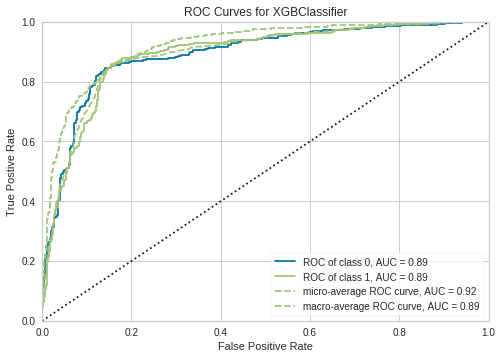

In [232]:
plot_model(tuned_xgboost, plot = 'auc')

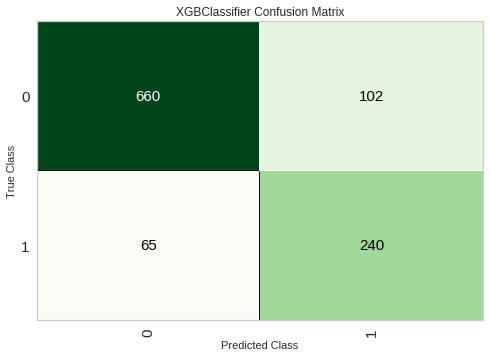

In [46]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

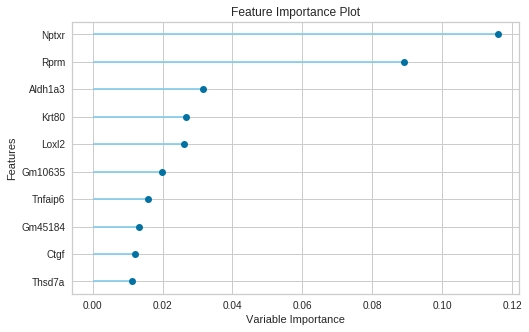

In [52]:
plot_model(tuned_xgboost,plot = 'feature')

In [233]:
predict_model(tuned_xgboost)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Extreme Gradient Boosting    0.8482  0.8917  0.8066  0.7049  0.7523  0.6435

Npy     Ptgs2     Pbld1   Gm13889     Cplx3  Tshz2     Cyr61  \
0     0.000000  1.586067  0.000000  0.000000  0.000000    0.0  0.000000   
1     0.000000  0.000000  0.000000  2.424604  0.000000    0.0  0.000000   
2     0.000000  4.526924  0.000000  3.844533  0.000000    0.0  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
4     0.000000  2.370602  0.000000  1.920197  0.000000    0.0  0.000000   
5     0.000000  0.000000  0.000000  1.092569  0.000000    0.0  0.000000   
6     0.000000  0.000000  0.000000  1.035810  0.000000    0.0  0.000000   
7     0.000000  0.000000  3.426853  0.000000  0.000000    0.0  1.884594   
8     0.890814  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
9     0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
10    0.000000  2.768026  0.000000  4.154091  0.000000    0.0  0.000000   
11    0.000000  2.884241  0.000000  2.340201  0.000000    0.0  2.140850   
12    0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
13    0.000000  0.000000  0.000000  2.787622  0.000000    0.0  3.844323   
14    0.000000  0.000000  0.000000  0.000000  0.000000    0.0  1.905470   
15    0.000000  0.000000  0.000000  0.966536  0.000000    0.0  0.000000   
16    0.000000  0.000000  0.000000  3.288643  0.000000    0.0  3.866486   
17    3.558763  2.117624  0.000000  1.234635  0.000000    0.0  0.000000   
18    0.000000  0.000000  0.000000  0.000000  0.000000    0.0  3.152369   
19    0.955019  0.000000  0.000000  0.000000  0.000000    0.0  0.955019   
20    0.000000  0.000000  0.000000  1.850995  0.000000    0.0  0.000000   
21    0.000000  0.000000  0.000000  0.897201  0.000000    0.0  0.000000   
22    0.000000  0.000000  0.000000  2.260493  0.000000    0.0  0.000000   
23    0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
24    0.000000  0.000000  0.000000  0.968154  0.000000    0.0  3.101444   
25    0.000000  0.000000  0.000000  2.894378  0.000000    0.0  1.732730   
26    0.000000  0.000000  0.000000  0.000000  0.000000    0.0  1.765794   
27    0.000000  0.919894  0.000000  0.919894  0.000000    0.0  0.000000   
28    0.000000  0.000000  0.000000  0.000000  0.000000    0.0  2.727720   
29    3.018509  4.169603  0.000000  1.018544  1.512557    0.0  0.000000   
...        ...       ...       ...       ...       ...    ...       ...   
1037  0.000000  0.000000  0.000000  0.000000  0.000000    0.0  1.374251   
1038  0.000000  2.093291  0.000000  0.000000  0.000000    0.0  0.000000   
1039  0.000000  0.000000  0.000000  1.922972  0.000000    0.0  1.735719   
1040  0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.940983   
1041  0.000000  0.000000  0.000000  1.484970  0.995995    0.0  0.000000   
1042  0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
1043  0.000000  0.901039  0.000000  0.000000  0.000000    0.0  2.117555   
1044  0.000000  0.000000  0.000000  0.000000  0.000000    0.0  2.312356   
1045  0.000000  0.000000  0.000000  2.878769  0.000000    0.0  2.458395   
1046  0.000000  0.000000  0.000000  2.553902  0.000000    0.0  3.551846   
1047  0.000000  2.301889  0.000000  0.826243  0.000000    0.0  1.272408   
1048  0.000000  0.000000  1.419082  0.000000  0.000000    0.0  0.000000   
1049  0.000000  0.000000  0.000000  0.776093  0.000000    0.0  2.788004   
1050  0.000000  0.000000  0.000000  2.858835  0.000000    0.0  0.000000   
1051  0.000000  0.000000  0.000000  1.111045  0.000000    0.0  2.907940   
1052  0.000000  1.998001  0.000000  0.000000  0.000000    0.0  0.000000   
1053  0.000000  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   
1054  0.000000  0.000000  0.000000  2.646514  0.000000    0.0  0.000000   
1055  1.382869  4.243991  0.913552  4.345767  0.000000    0.0  2.857893   
1056  0.000000  0.000000  0.000000  1.180941  0.000000    0.0  1.180941   
1057  0.000000  0.000000  0.000000  2.298054  0.000000    0.0  0.000000   
1058  0.000000  0.000000  0.000000  

In [12]:
save_experiment('Experiment_BLA_19July2020')

Experiment Succesfully Saved


In [5]:
exp1=load_experiment('Experiment_BLA_19July2020')

Object
0     Classification Setup Config
1                  X_training Set
2                  y_training Set
3                      X_test Set
4                      y_test Set
5         Transformation Pipeline
6             Tuned XGBClassifier
7  Tuned XGBClassifier Score Grid

In [6]:
exp1[6]

Npy     Ptgs2     Pbld1   Gm13889     Cplx3  \
pfc_3_CGAGGCTGTGTGGACA  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_1_TGACTCCCATACTGAC  0.000000  0.000000  0.000000  3.562668  0.000000   
pfc_2_GATTCGAGTTGTCCCT  0.000000  1.318210  0.000000  0.000000  0.000000   
pfc_4_TGATGCATCTCGCCTA  0.000000  1.504389  0.000000  1.011856  0.000000   
pfc_2_ACTTTCAGTTGACTAC  0.000000  0.000000  0.000000  1.098346  0.000000   
pfc_2_AACCAACAGGGAGGGT  0.000000  0.000000  0.000000  2.646514  0.000000   
pfc_1_TGAGCATTCTGAGCAT  0.000000  1.259012  0.000000  0.000000  0.000000   
pfc_4_CGCATGGGTTCCTACC  0.000000  1.189807  0.000000  0.000000  0.000000   
pfc_1_GGATGTTTCATTTGGG  0.918173  0.918173  0.000000  0.000000  0.000000   
pfc_2_TTCGCTGCACGATAGG  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_1_TGAGTCATCCGTCCTA  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_2_GTAATGCCACAATCTG  0.000000  0.000000  0.000000  1.050984  0.000000   
pfc_3_ATCGGATAGTACTGTC  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_2_ACGTAGTAGCCTTTGA  0.000000  1.136392  0.000000  0.000000  0.000000   
pfc_2_TCCCATGAGCCAAGTG  0.000000  0.000000  0.000000  1.313777  0.000000   
pfc_4_CATTCATTCTGTGCGG  0.000000  0.000000  0.000000  1.552818  0.000000   
pfc_3_CACGAATTCAACGTGT  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_3_CCCGGAAGTAACTGCT  0.000000  0.000000  1.182508  0.000000  0.000000   
pfc_3_TCGGATATCGCAGTCG  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_4_GTCGTTCCACATACTG  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_1_GAATCACTCTGTAACG  0.000000  0.000000  0.000000  0.000000  3.352319   
pfc_2_GTAGAGGTCCGATTAG  0.000000  0.000000  0.000000  1.092385  0.000000   
pfc_1_GGACGTCAGGTCGACA  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_2_CACCGTTTCTGTAAGC  0.000000  0.000000  0.000000  2.186102  0.000000   
pfc_2_TCCACCAGTAACAGTA  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_3_TCCTCGAAGAGCAGCT  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_4_CCAAGCGTCGCTTACC  0.000000  0.904877  0.000000  0.000000  0.000000   
pfc_1_GTAATGCTCGTCGACG  0.000000  0.000000  0.000000  4.650021  0.000000   
pfc_4_TCAATCTTCCTAAGTG  2.501025  0.955236  0.000000  2.501025  0.000000   
pfc_1_CATTCATTCAACTCTT  0.000000  0.000000  0.000000  2.368775  0.000000   
pfc_4_AGAAATGCATTCATCT  0.000000  0.000000  1.243098  2.759884  0.000000   
pfc_4_TACGCTCTCCGTGGCA  0.000000  0.000000  0.698205  1.954566  0.000000   
pfc_3_GTCATGAGTTTGGAAA  0.000000  0.000000  0.000000  0.774602  0.000000   
pfc_3_TAGGTTGCAGGTCTCG  0.000000  0.000000  0.000000  1.969169  0.000000   
pfc_1_GAAGAATGTACCGTCG  0.000000  0.000000  0.000000  1.014806  0.000000   
pfc_2_GATTTCTAGGGTACAC  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_4_GGGTGAATCTCCCATG  0.000000  4.683251  0.000000  4.209353  0.000000   
pfc_4_GAGCTGCCAGCATTGT  0.000000  3.450043  0.000000  3.450043  0.000000   
pfc_4_TTCCTTCTCGAGAAGC  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_2_AATCGACTCAAGGAGC  0.000000  0.000000  0.000000  1.104676  0.000000   
pfc_2_AACCACAAGTGGCAGT  0.000000  1.262091  0.000000  0.000000  0.000000   
pfc_2_TACTTGTCACTGCATA  0.000000  1.995104  0.000000  0.000000  0.000000   
pfc_2_CCGGTAGGTGACTGTT  0.000000  1.032213  0.000000  0.000000  0.000000   
pfc_4_TTTACCAGTGCTCCGA  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_3_ACCTGAATCATTCATC  0.000000  0.000000  0.000000  2.293332  0.000000   
pfc_1_GCCCGAAGTTCCTAGA  0.000000  0.000000  0.000000  1.595160  0.000000   
pfc_1_GAATCGTCACCGTACG  0.000000  1.209904  0.000000  0.000000  0.000000   
pfc_4_TATTGGGCAAATGAAC  0.000000  0.000000  0.000000  2.747030  0.000000   
pfc_2_CAACAGTCAATTGCGT  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_1_GTCTAGATCGCAATGT  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_2_GATAGAACAGATACTC  0.000000  0.000000  0.000000  0.000000  0.000000   
pfc_4_TTACGCCGTTGACGGA  0.973309  1.457073  0.000000  3.920003  0.000000   
p

In [7]:
from sklearn.model_selection import train_test_split
from pycaret import preprocess
from sklearn import metrics

X = exp1[3]
y = exp1[4]

# Number of random trials
NUM_TRIALS = 10
d = []
for i in range(NUM_TRIALS):
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y,stratify=y, test_size=0.9,  random_state=i)
    pred_ =exp1[6].predict(X_test)
    pred_prob = exp1[6].predict_proba(X_test)[:,1]
    acc = metrics.accuracy_score(y_test,pred_)
    auc = metrics.roc_auc_score(y_test,pred_prob)
    prec = metrics.precision_score(y_test,pred_)
    f1 = metrics.f1_score(y_test,pred_)
    recall = metrics.recall_score(y_test,pred_)
    kappa = metrics.cohen_kappa_score(y_test,pred_)
    d.append(
        {
           'Accuracy' : acc, 'AUC': auc, 'F1' : f1, 'Precision':prec, 'Recall':recall, 'Kappa':kappa
        }
    )
    model_results=pd.DataFrame(d)


In [14]:
model_results

AUC  Accuracy        F1     Kappa  Precision    Recall
0  0.853245  0.938606  0.063492  0.056134   0.500000  0.033898
1  0.855275  0.939646  0.064516  0.058925   0.666667  0.033898
2  0.852287  0.938606  0.063492  0.056134   0.500000  0.033898
3  0.850821  0.938606  0.063492  0.056134   0.500000  0.033898
4  0.859033  0.938606  0.063492  0.056134   0.500000  0.033898
5  0.853208  0.938606  0.063492  0.056134   0.500000  0.033898
6  0.861701  0.938606  0.063492  0.056134   0.500000  0.033898
7  0.856270  0.938606  0.063492  0.056134   0.500000  0.033898
8  0.844376  0.937565  0.032258  0.026474   0.333333  0.016949
9  0.866323  0.939646  0.064516  0.058925   0.666667  0.033898